# Logistic Regression
# Load Libraries

In [1]:
# Enable inline plotting in the notebook. Comes before importing matplotlib
%matplotlib inline

# Import libraries for plotting
import matplotlib.pyplot as plt # for basic plotting
import seaborn as sns # for advanced visualization options; requires pandas and matplotlib
import plotnine as p9 # for python ggplot; create plotting graphics declaratively
import pylab # matplotlib module used for Q-Q plot

# Import libraries for data manipulation
import pandas as pd # for working with dataframes
import numpy as np # for arrays and mathematical operations

# Import libraries for machine learning
import sklearn # for machine learning algorithms and tools
from sklearn.feature_selection import RFE # for Recursive Feature Elimination (RFE)
from sklearn.ensemble import RandomForestClassifier # for random forest classifier
from sklearn.linear_model import LogisticRegression # for logistic regression (used as RFE estimator)
from sklearn.pipeline import Pipeline # for creating a pipeline of data transformations
from sklearn.preprocessing import StandardScaler # for standardizing data
from sklearn.model_selection import ( 
    train_test_split, # for splitting data into training and testing sets
    cross_val_score, # for cross-validation
    RepeatedKFold) # for repeated k-fold cross-validation
from sklearn.metrics import (
    accuracy_score, # for accuracy metric in classification tasks
    mean_absolute_error) # for mean absolute error metric in regression tasks

# Import libraries for statistical analysis
import statsmodels.api as sm # for regression analysis
import statsmodels.stats.outliers_influence as inf # for checking for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif # for variance inflation factor (VIF)
from statsmodels.graphics.mosaicplot import mosaic # for confusion matrix.
from scipy import stats # for statistical functions; qq plots of residuals

In [2]:
# Import Data
df = pd.read_csv('c:/LabFiles/d208/medical/medical_clean.csv', index_col=0) # path to csv; change for your environment
df.index.names = ['index'] # we are using CaseNumber as the index. relabeling it as 'index' to be clear how it is being used.
pd.set_option("display.max_columns", None) # to display all columns
df.head()

,Customer_id,Interaction,UID,City,State,County,Zip,Lat,Lng,Population,Area,TimeZone,Job,Children,Age,Income,Marital,Gender,ReAdmis,VitD_levels,Doc_visits,Full_meals_eaten,vitD_supp,Soft_drink,Initial_admin,HighBlood,Stroke,Complication_risk,Overweight,Arthritis,Diabetes,Hyperlipidemia,BackPain,Anxiety,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,Initial_days,TotalCharge,Additional_charges,Item1,Item2,Item3,Item4,Item5,Item6,Item7,Item8
index,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,C412403,8cd49b13-f45a-4b47-a2bd-173ffa932c2f,3a83ddb66e2ae73798bdf1d705dc0932,Eva,AL,Morgan,35621,34.34960,-86.72508,2951,Suburban,America/Chicago,"Psychologist, sport and exercise",1,53,86575.93,Divorced,Male,No,19.141466,6,0,0,No,Emergency Admission,Yes,No,Medium,No,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Blood Work,10.585770,3726.702860,17939.403420,3,3,2,2,4,3,3,4
2,Z919181,d2450b70-0337-4406-bdbb-bc1037f1734c,176354c5eef714957d486009feabf195,Marianna,FL,Jackson,32446,30.84513,-85.22907,11303,Urban,America/Chicago,Community development worker,3,51,46805.99,Married,Female,No,18.940352,4,2,1,No,Emergency Admission,Yes,No,High,Yes,No,No,No,No,No,No,Yes,No,Intravenous,15.129562,4193.190458,17612.998120,3,4,3,4,4,4,3,3
3,F995323,a2057123-abf5-4a2c-abad-8ffe33512562,e19a0fa00aeda885b8a436757e889bc9,Sioux Falls,SD,Minnehaha,57110,43.54321,-96.63772,17125,Suburban,America/Chicago,Chief Executive Officer,3,53,14370.14,Widowed,Female,No,18.057507,4,1,0,No,Elective Admission,Yes,No,Medium,Yes,No,Yes,No,No,No,No,No,No,Blood Work,4.772177,2434.234222,17505.192460,2,4,4,4,3,4,3,3
4,A879973,1dec528d-eb34-4079-adce-0d7a40e82205,cd17d7b6d152cb6f23957346d11c3f07,New Richland,MN,Waseca,56072,43.89744,-93.51479,2162,Suburban,America/Chicago,Early years teacher,0,78,39741.49,Married,Male,No,16.576858,4,1,0,No,Elective Admission,No,Yes,Medium,No,Yes,No,No,No,No,No,Yes,Yes,Blood Work,1.714879,2127.830423,12993.437350,3,5,5,3,4,5,5,5
5,C544523,5885f56b-d6da-43a3-8760-83583af94266,d2f0425877b10ed6bb381f3e2579424a,West Point,VA,King William,23181,37.59894,-76.88958,5287,Rural,America/New_York,Health promotion specialist,1,22,1209.56,Widowed,Female,No,17.439069,5,0,2,Yes,Elective Admission,No,No,Low,No,No,No,Yes,No,No,Yes,No,No,CT Scan,1.254807,2113.073274,3716.525786,2,1,3,3,5,3,4,3


# C1 - Data Cleaning
## Check for Duplicates and Nulls

In [3]:
# Check for Nulls and duplicates
## Duplicates whole dataframe
print(f"Are there duplicates in the 10,000 rows?\n{df.duplicated().value_counts()}")
## Check for Nulls with `isnull().sum()`
null_counts = df.isnull().sum()
null_variables = null_counts[null_counts > 0]
print(f"\nColumns with NULL values would appear here==> {null_variables}\n")
# Visual check
print('Visual spot check. Is everything as expected?')
print(f"\n{df.info()}")

Are there duplicates in the 10,000 rows?
False    10000
Name: count, dtype: int64

Columns with NULL values would appear here==> Series([], dtype: int64)

Visual spot check. Is everything as expected?
<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 49 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Customer_id         10000 non-null  object 
 1   Interaction         10000 non-null  object 
 2   UID                 10000 non-null  object 
 3   City                10000 non-null  object 
 4   State               10000 non-null  object 
 5   County              10000 non-null  object 
 6   Zip                 10000 non-null  int64  
 7   Lat                 10000 non-null  float64
 8   Lng                 10000 non-null  float64
 9   Population          10000 non-null  int64  
 10  Area                10000 non-null  object 
 11  TimeZone            10000 non-null  object 
 12  Job 

## Check for Outliers

Checking with Boxplots
Outliers for Age: 0
Outliers for Income: 326
Outliers for VitD_levels: 60
Outliers for Initial_days: 0
Outliers for TotalCharge: 0
Outliers for Additional_charges: 424


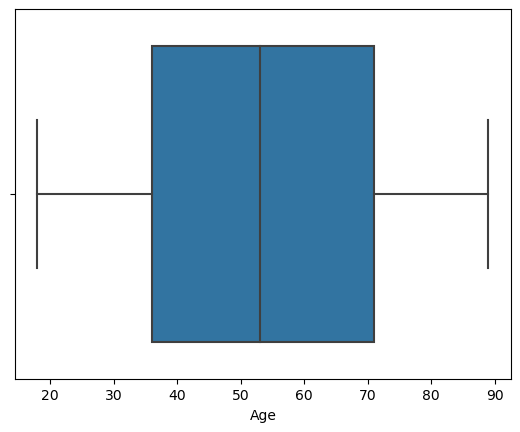

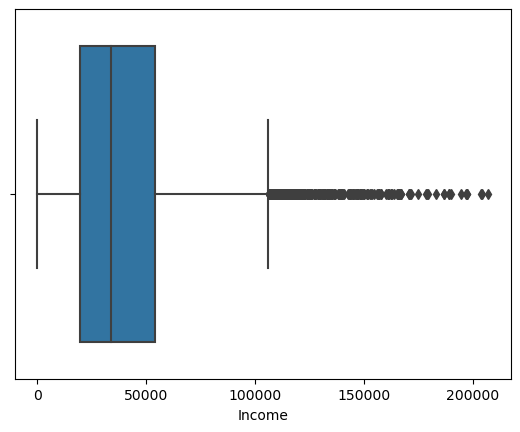

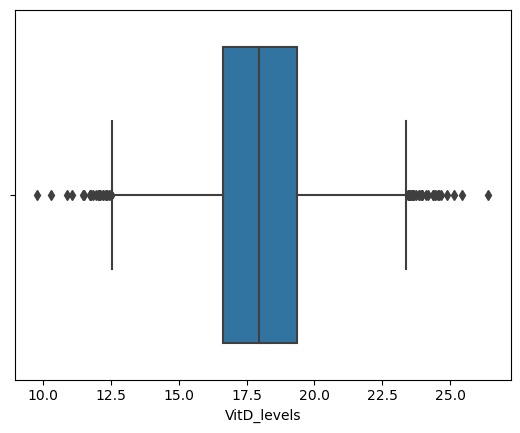

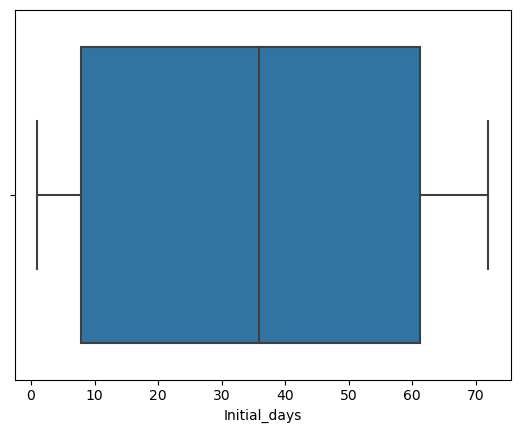

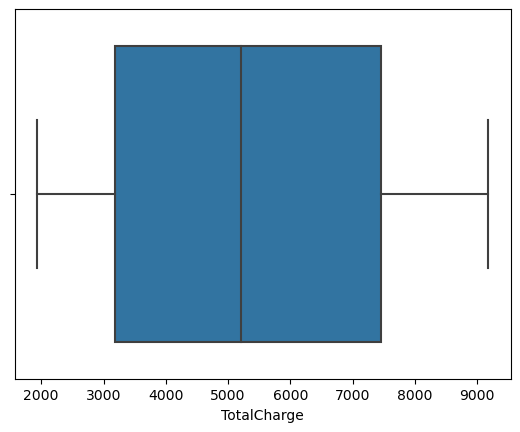

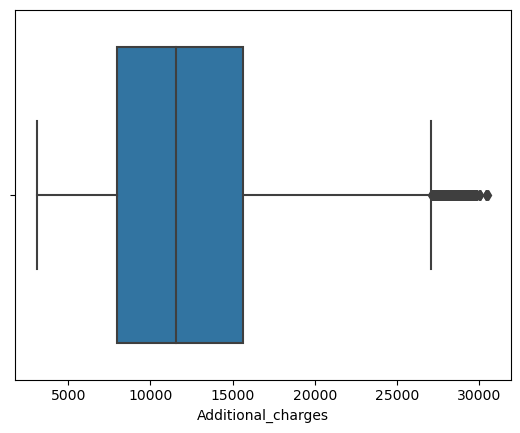

In [4]:
# Check with boxplots
# Boxplots
print('Checking with Boxplots')
# filter on only int64 and float64 datatype
int_float_cols = [col for col in df.columns if df[col].dtype in ('int64', 'float64')]

# create check_outliers. 
check_outliers = [col for col in int_float_cols if col in ('Initial_days', 'TotalCharge', 'Additional_charges', 'VitD_levels', 'Income', 'Age')] # list columns we want

# # Create a figure for each column
for col in check_outliers:
    plt.figure()
    sns.boxplot(x=df[col], data=df)
    
    # Get the lower and upper whiskers for the column
    # https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html
    q1 = df[col].quantile(q=0.25)
    q3 = df[col].quantile(q=0.75)
    iqr = q3 - q1
    lower_whisker = q1 - 1.5 * iqr
    upper_whisker = q3 + 1.5 * iqr
    
    # Get the outliers for the column
    outliers = df[(df[col] < lower_whisker) | (df[col] > upper_whisker)][col]
    
    # Print the outliers for the column
    print(f"Outliers for {col}: {outliers.count()}")

# C2 - Summary Statistics

In [5]:
initial_variables = df[['Initial_days', 'Anxiety', 'Diabetes', 'Soft_drink', 'TotalCharge', 'Additional_charges', 'VitD_levels', 'Income', 'Age', 'ReAdmis', 'HighBlood', 'Overweight', 'Hyperlipidemia', 'Complication_risk']]
print(initial_variables.describe(include = 'O').transpose())
print(initial_variables.describe().transpose())

                   count unique     top  freq
Anxiety            10000      2      No  6785
Diabetes           10000      2      No  7262
Soft_drink         10000      2      No  7425
ReAdmis            10000      2      No  6331
HighBlood          10000      2      No  5910
Overweight         10000      2     Yes  7094
Hyperlipidemia     10000      2      No  6628
Complication_risk  10000      3  Medium  4517
                      count          mean           std          min   
Initial_days        10000.0     34.455299     26.309341     1.001981  \
TotalCharge         10000.0   5312.172769   2180.393838  1938.312067   
Additional_charges  10000.0  12934.528587   6542.601544  3125.703000   
VitD_levels         10000.0     17.964262      2.017231     9.806483   
Income              10000.0  40490.495160  28521.153293   154.080000   
Age                 10000.0     53.511700     20.638538    18.000000   

                             25%           50%           75%            max  
Ini

# C3 - Univariate and Bivariate Visualizations
## Histograms of Quantitative Values

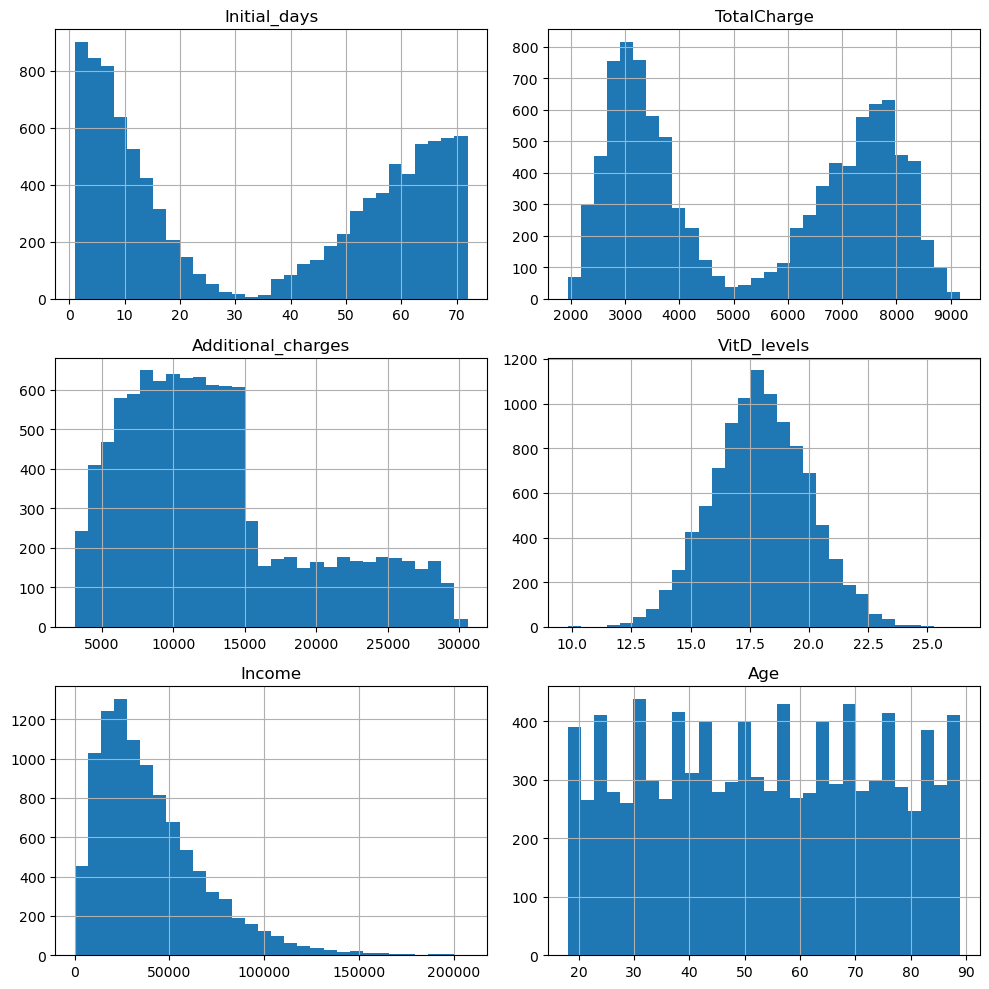

In [7]:
# Histograms
initial_variables.hist(figsize=(10, 10), bins=30)
plt.tight_layout()
plt.show()

## Univariate Statistics for Qualitative Variables

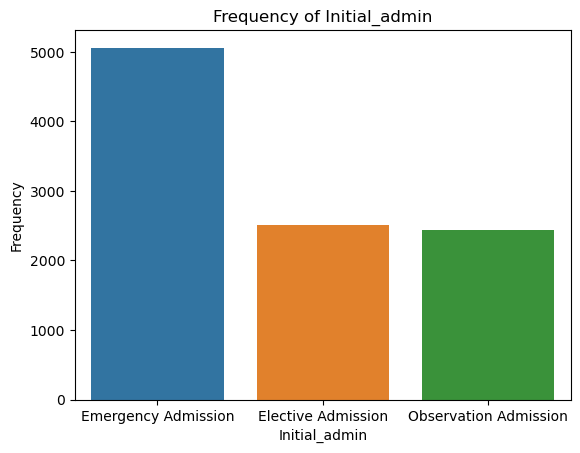

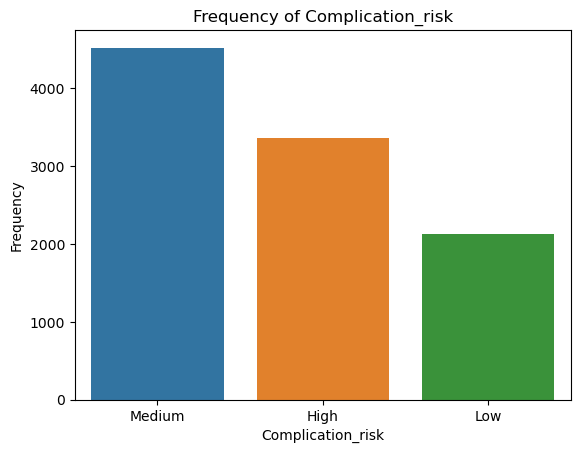

In [6]:
# Bar Charts for Categorical data: Initial_admin; Complication_risk
# Initial_admin
sns.countplot(x='Initial_admin', data=df)
plt.xlabel('Initial_admin')
plt.ylabel('Frequency')
plt.title('Frequency of Initial_admin')
plt.show()
# Complication_risk
sns.countplot(x='Complication_risk', data=df)
plt.xlabel('Complication_risk')
plt.ylabel('Frequency')
plt.title('Frequency of Complication_risk')
plt.show()

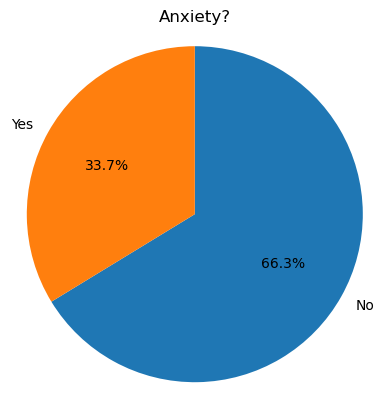

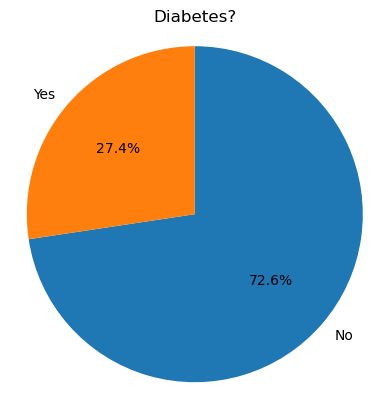

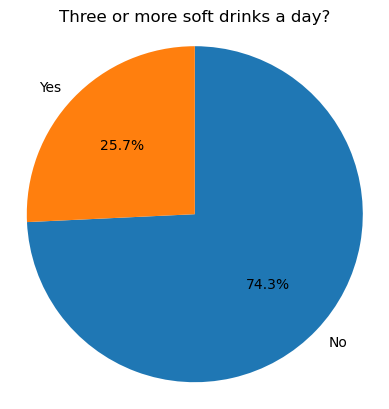

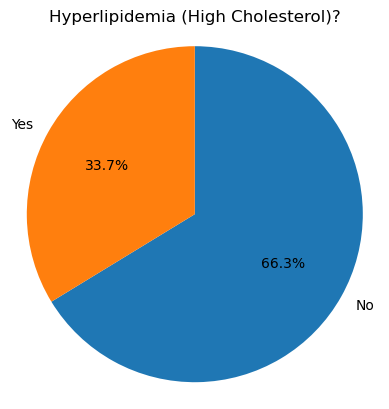

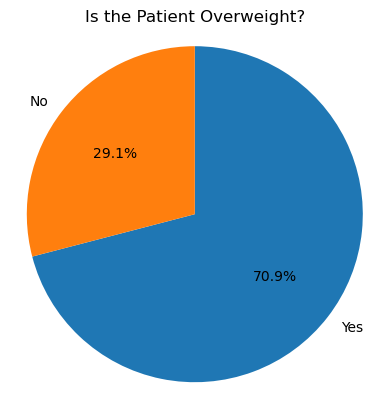

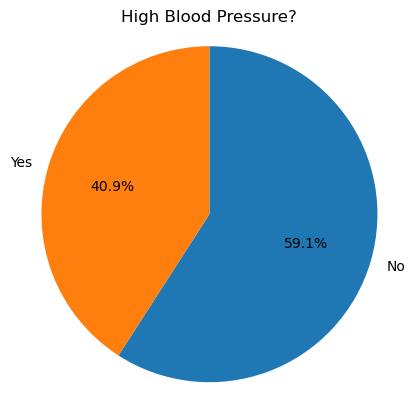

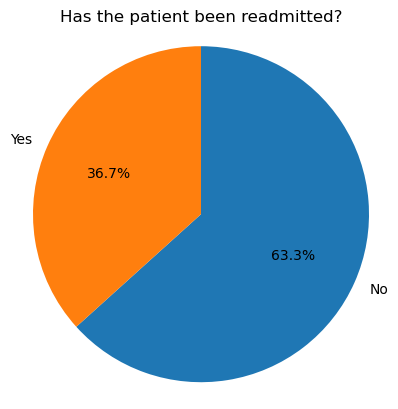

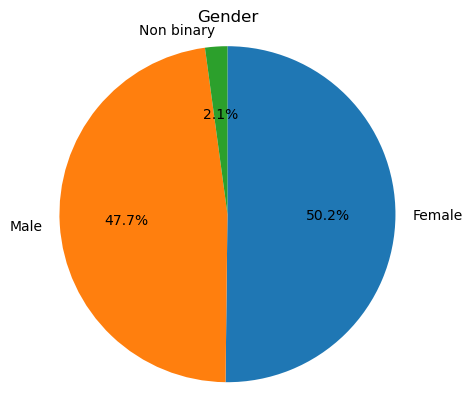

In [9]:
# Univariate Pie Charts for Yes/No categorical
# LEFT plot: Univariate exploration of diabetes
# Anxiety
plt.title('Anxiety?')
hl_counts = df.Hyperlipidemia.value_counts()
hl_labels = ["No", "Yes"]
plt.pie(hl_counts, labels=hl_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('square')
plt.show();
# Hyperlipidemia
# Hyperlipidemia
plt.title('Diabetes?')
hl_counts = df.Diabetes.value_counts()
hl_labels = ["No", "Yes"]
plt.pie(hl_counts, labels=hl_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('square')
plt.show();
# Hyperlipidemia
plt.title('Three or more soft drinks a day?')
hl_counts = df.Soft_drink.value_counts()
hl_labels = ["No", "Yes"]
plt.pie(hl_counts, labels=hl_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('square')
plt.show();
plt.title('Hyperlipidemia (High Cholesterol)?')
hl_counts = df.Hyperlipidemia.value_counts()
hl_labels = ["No", "Yes"]
plt.pie(hl_counts, labels=hl_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('square')
plt.show();
# Overweight
plt.title('Is the Patient Overweight?')
hl_counts = df.Overweight.value_counts()
hl_labels = ["Yes", "No"]
plt.pie(hl_counts, labels=hl_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('square')
plt.show();
# HighBlood
plt.title('High Blood Pressure?')
hl_counts = df.HighBlood.value_counts()
hl_labels = ["No", "Yes"]
plt.pie(hl_counts, labels=hl_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('square')
plt.show();
# ReAdmis
plt.title('Has the patient been readmitted?')
hl_counts = df.ReAdmis.value_counts()
hl_labels = ["No", "Yes"]
plt.pie(hl_counts, labels=hl_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('square')
plt.show();
# Gender
plt.title('Gender')
hl_counts = df.Gender.value_counts()
hl_labels = ["Female", "Male", "Non binary"]
plt.pie(hl_counts, labels=hl_labels, autopct='%1.1f%%', startangle=90, counterclock=False)
plt.axis('square')
plt.show();

## Bivariate Visualizations
### Density Plots

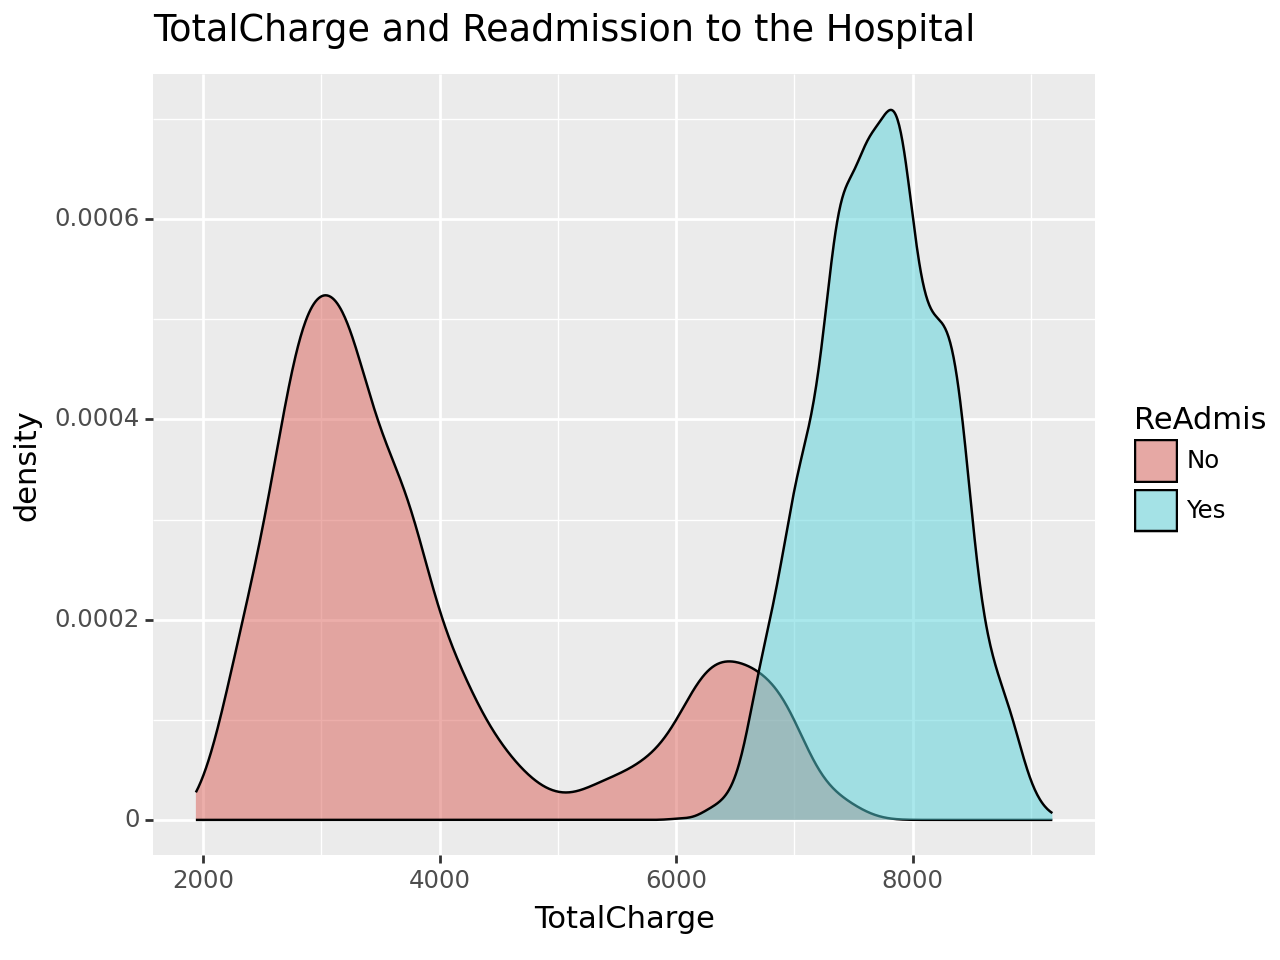

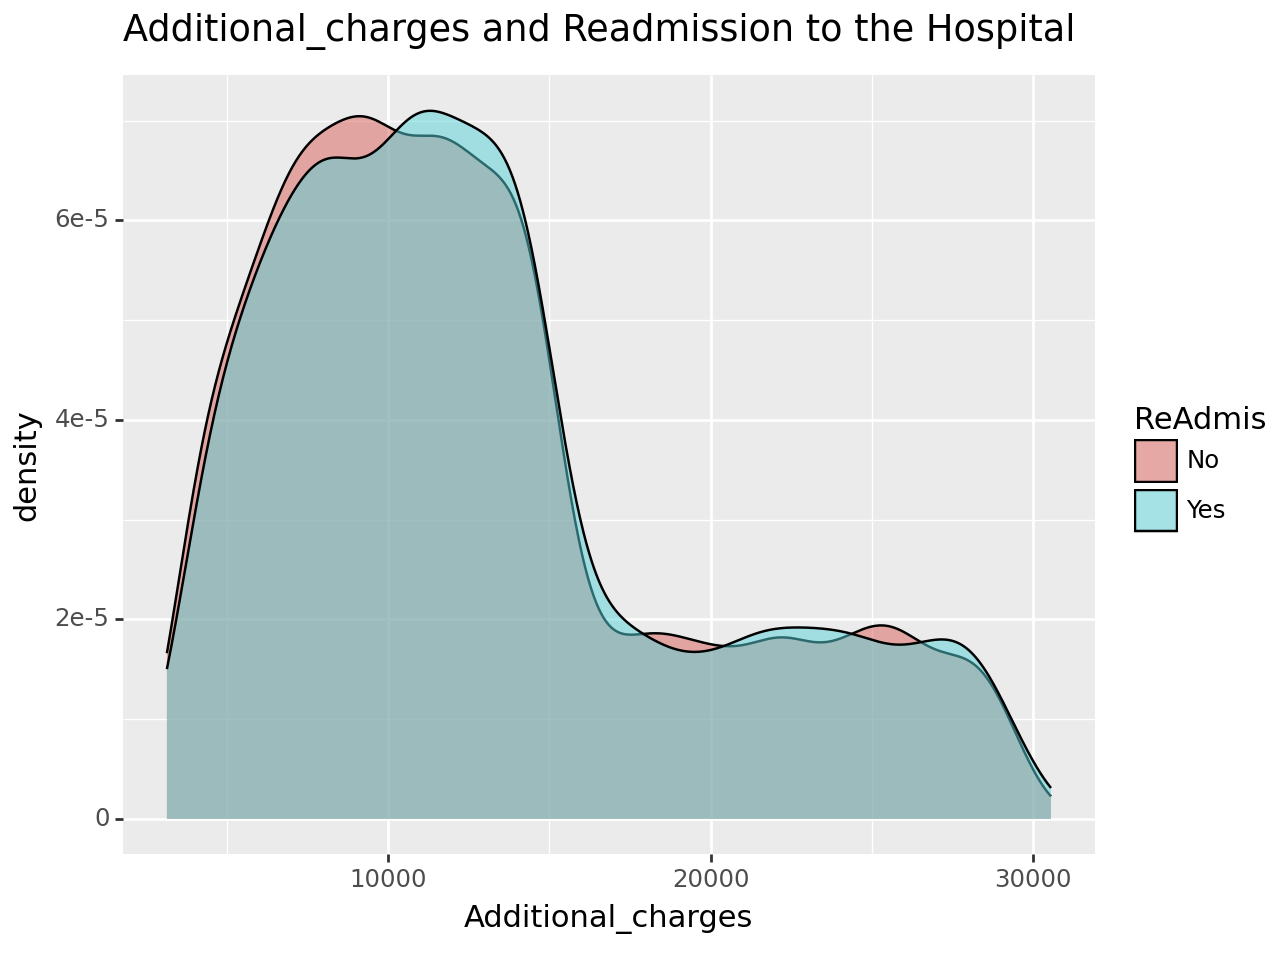

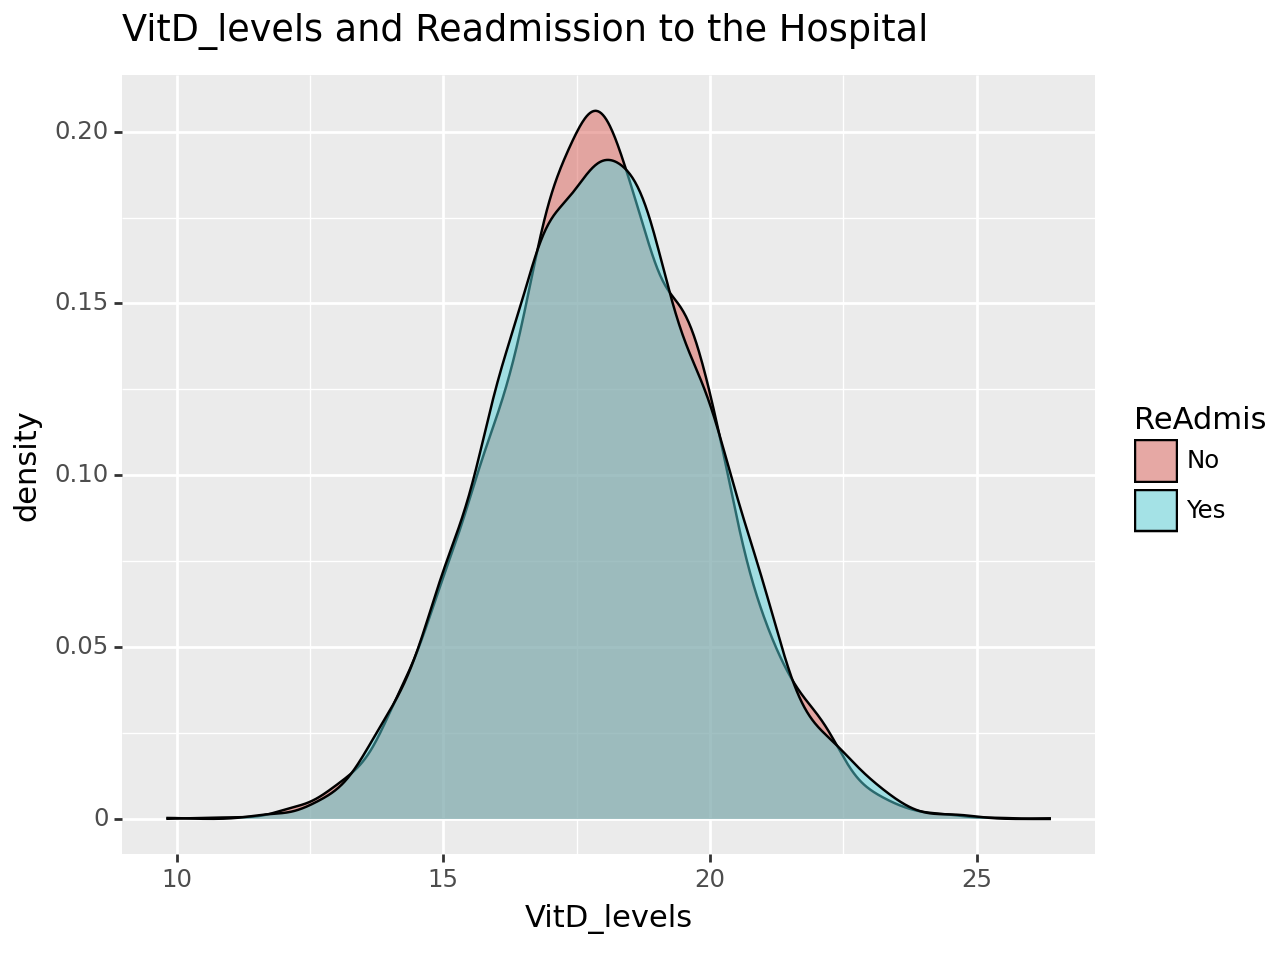

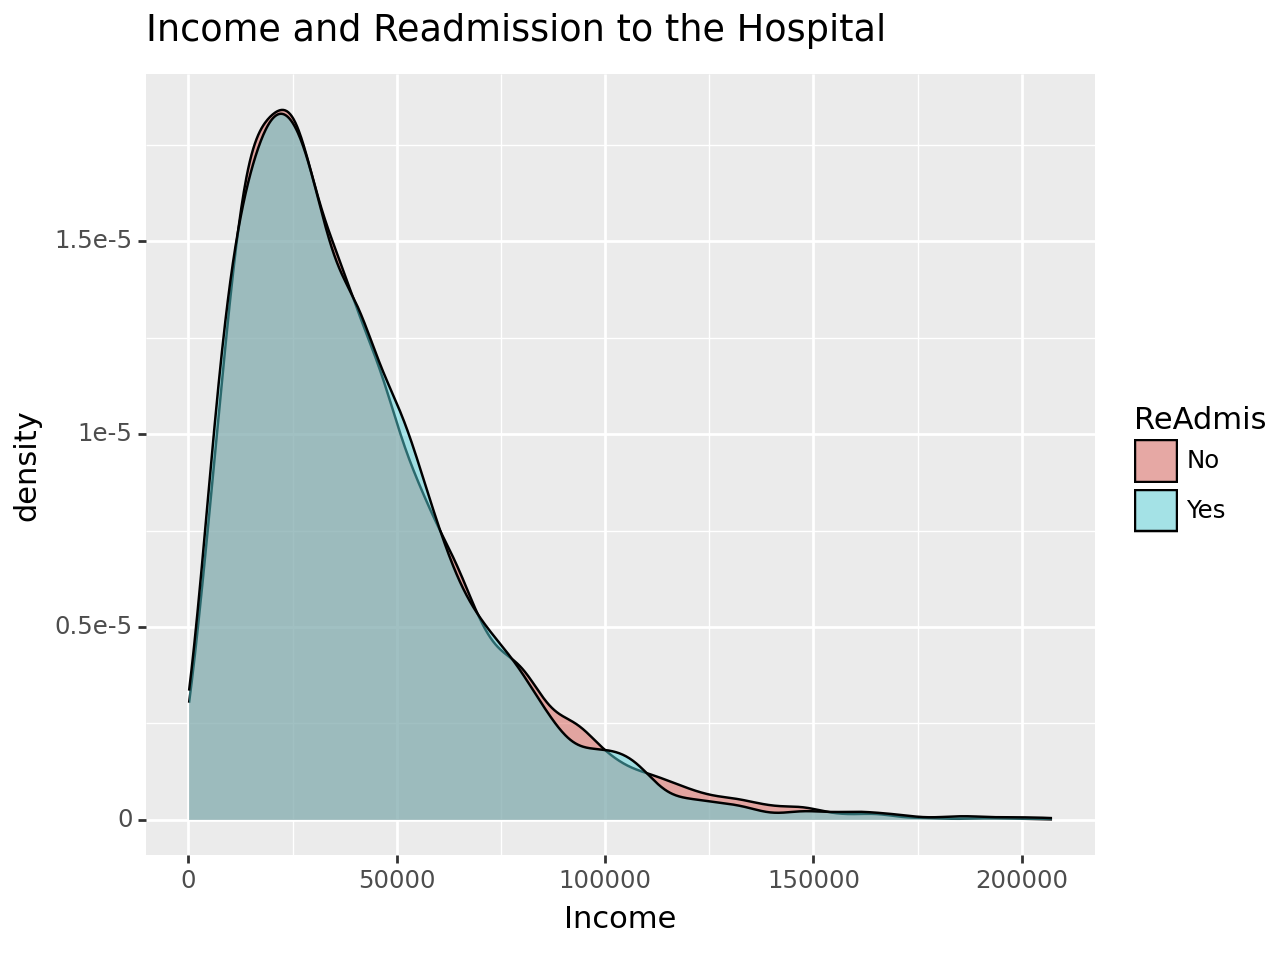

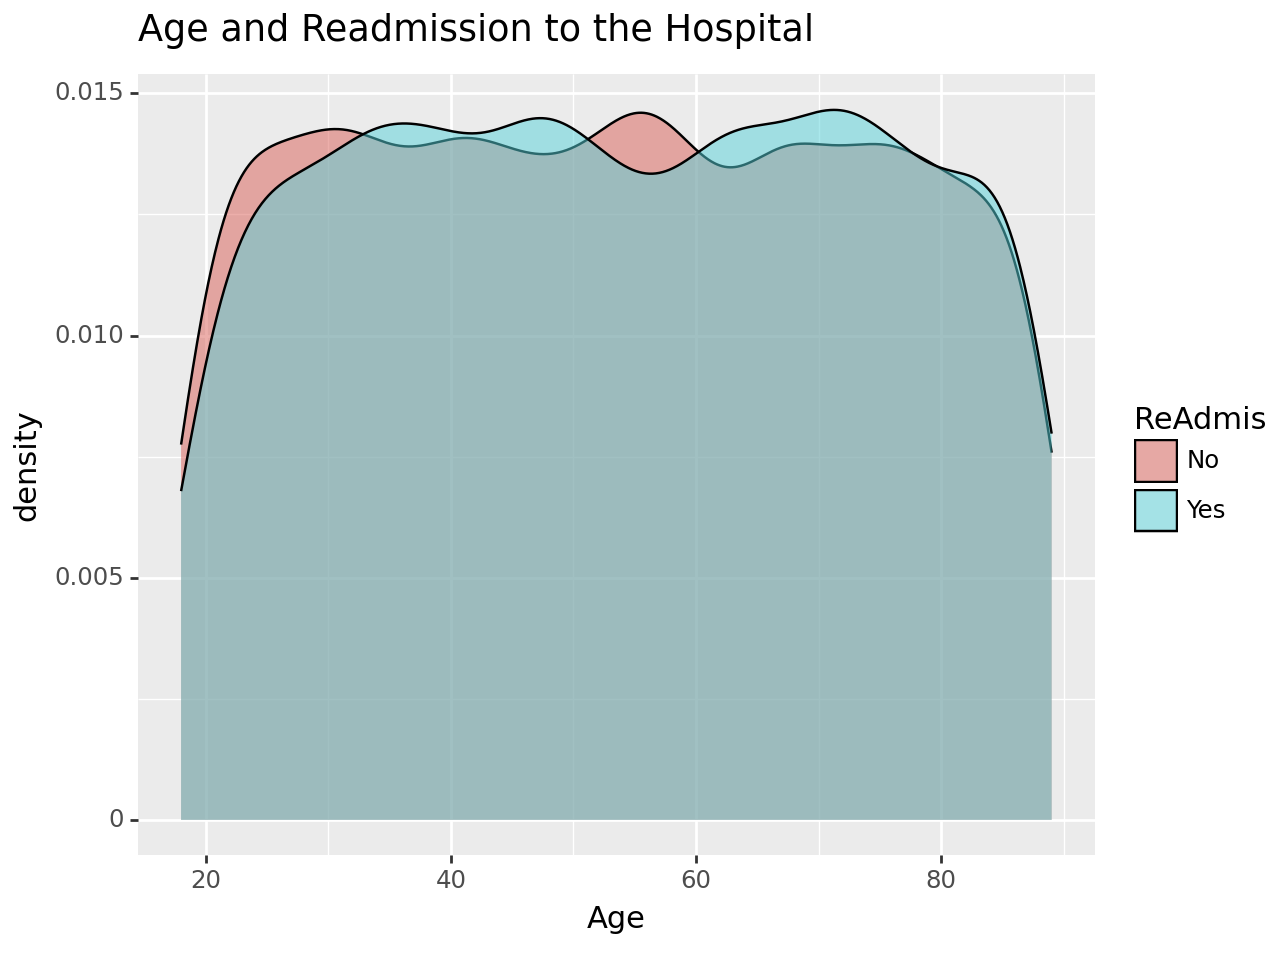

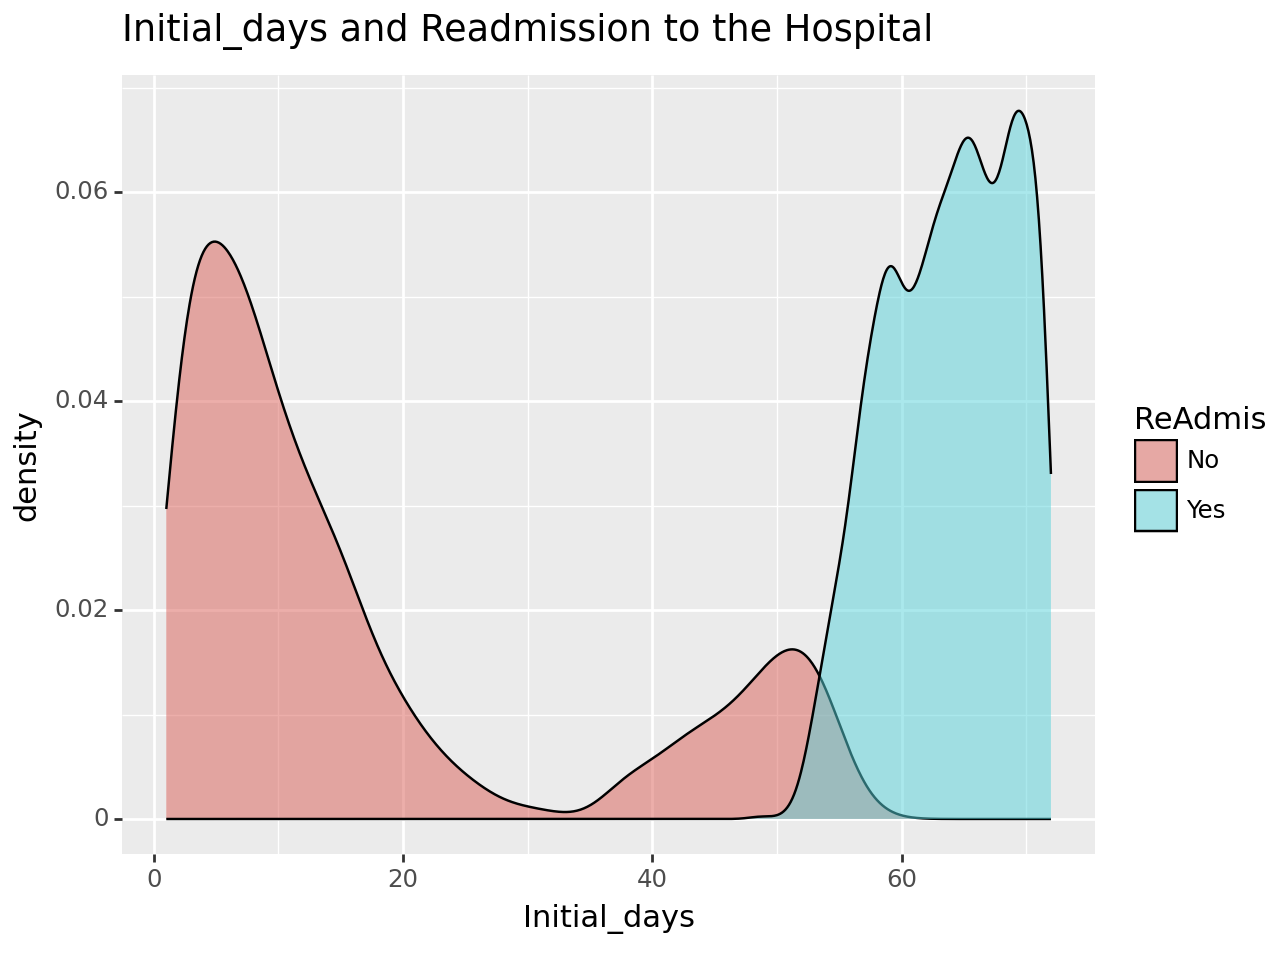

In [10]:
# For Logistics
# Density plots
print (p9.ggplot(df)+ 
    p9.aes(x='TotalCharge', fill='ReAdmis')+
    p9.geom_density(alpha=0.5)+
    p9.labs(title = "TotalCharge and Readmission to the Hospital")
    )
# Density plots Additional_charges with ReAdmis fill
print (p9.ggplot(df)+ 
    p9.aes(x='Additional_charges', fill='ReAdmis')+
    p9.geom_density(alpha=0.5)+
    p9.labs(title = "Additional_charges and Readmission to the Hospital")
    )
# Density plots VitD_levels with ReAdmis fill
print (p9.ggplot(df)+ 
    p9.aes(x='VitD_levels', fill='ReAdmis')+
    p9.geom_density(alpha=0.5)+
    p9.labs(title = "VitD_levels and Readmission to the Hospital")
    )
# Density plots Income with ReAdmis fill
print (p9.ggplot(df)+ 
    p9.aes(x='Income', fill='ReAdmis')+
    p9.geom_density(alpha=0.5)+
    p9.labs(title = "Income and Readmission to the Hospital")
    )
# Density plots Age with ReAdmis fill
print (p9.ggplot(df)+ 
    p9.aes(x='Age', fill='ReAdmis')+
    p9.geom_density(alpha=0.5)+
    p9.labs(title = "Age and Readmission to the Hospital")
    )
# density plot Initial_days with ReAdmis fill
print (p9.ggplot(df)+ 
    p9.aes(x='Initial_days', fill='ReAdmis')+
    p9.geom_density(alpha=0.5)+
    p9.labs(title = "Initial_days and Readmission to the Hospital")
    )

### Stacked Bar Plots for Qualitative Variables

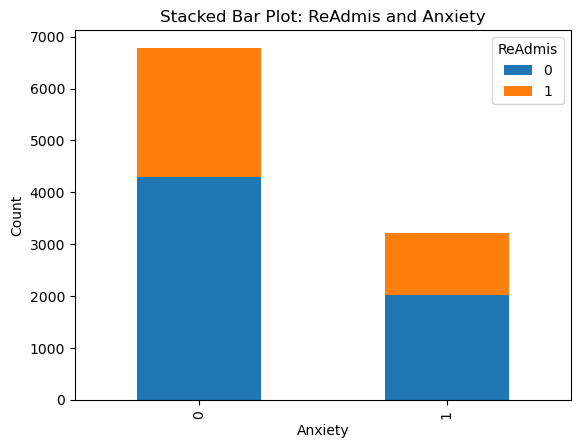

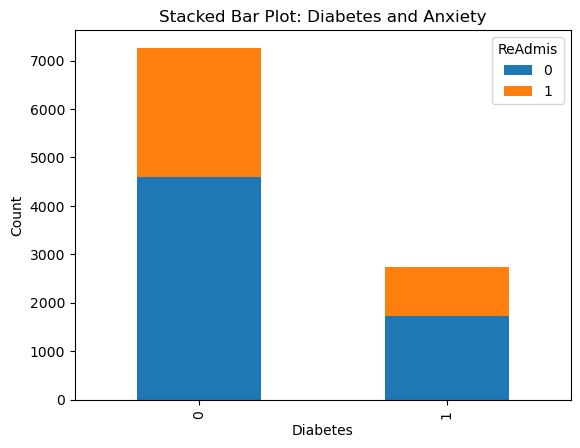

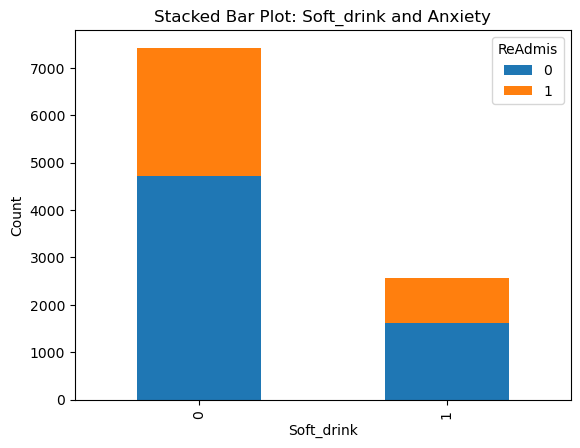

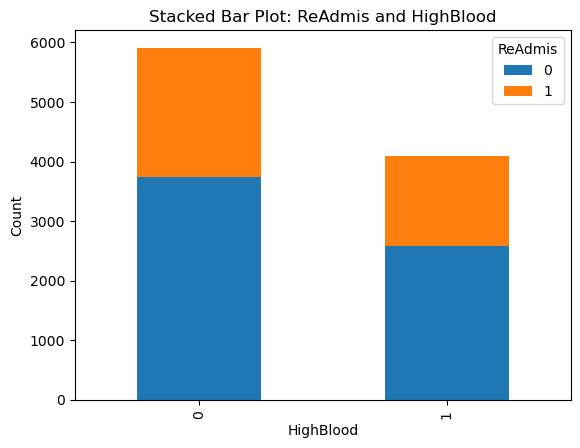

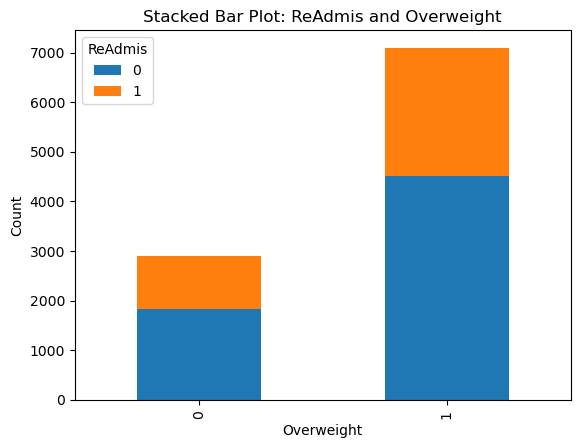

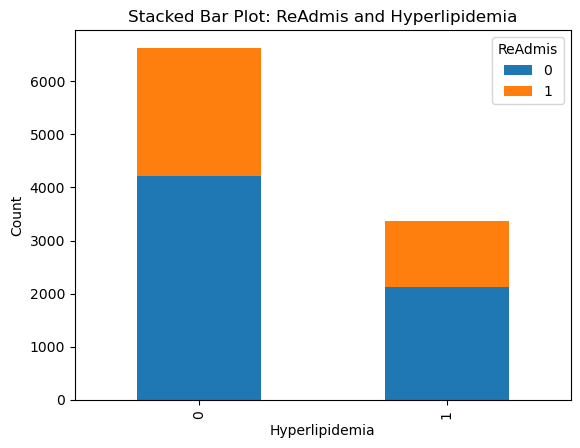

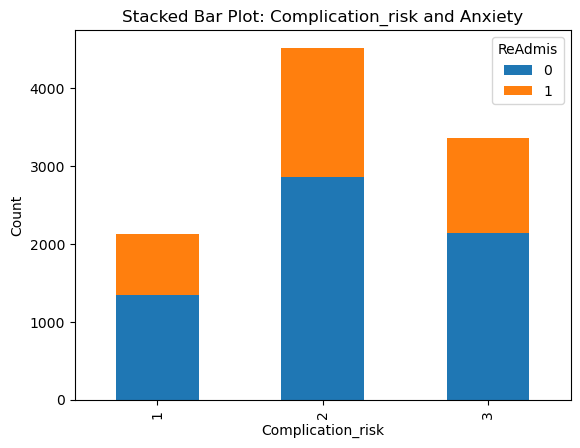

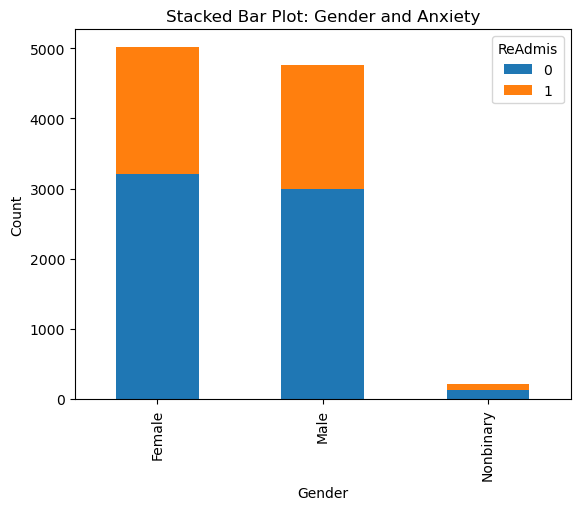

In [18]:
# Calculate the count of each combination of variables
cross_tab = pd.crosstab(df['Anxiety'], df['ReAdmis'])
# Plot the stacked bar plot Anxiety
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Anxiety')
plt.ylabel('Count')
plt.title('Stacked Bar Plot: ReAdmis and Anxiety')
plt.legend(title='ReAdmis')
plt.show()
# Diabetes
cross_tab = pd.crosstab(df['Diabetes'], df['ReAdmis'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Diabetes')
plt.ylabel('Count')
plt.title('Stacked Bar Plot: Diabetes and Anxiety')
plt.legend(title='ReAdmis')
plt.show()
# Soft_drink
cross_tab = pd.crosstab(df['Soft_drink'], df['ReAdmis'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Soft_drink')
plt.ylabel('Count')
plt.title('Stacked Bar Plot: Soft_drink and Anxiety')
plt.legend(title='ReAdmis')
plt.show()
# HighBlood
cross_tab = pd.crosstab(df['HighBlood'], df['ReAdmis'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('HighBlood')
plt.ylabel('Count')
plt.title('Stacked Bar Plot: ReAdmis and HighBlood')
plt.legend(title='ReAdmis')
plt.show()
# Overweight
cross_tab = pd.crosstab(df['Overweight'], df['ReAdmis'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Overweight')
plt.ylabel('Count')
plt.title('Stacked Bar Plot: ReAdmis and Overweight')
plt.legend(title='ReAdmis')
plt.show()
# Hyperlipidemia
cross_tab = pd.crosstab(df['Hyperlipidemia'], df['ReAdmis'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Hyperlipidemia')
plt.ylabel('Count')
plt.title('Stacked Bar Plot: ReAdmis and Hyperlipidemia')
plt.legend(title='ReAdmis')
plt.show()
# Complication_risk
cross_tab = pd.crosstab(df['Complication_risk'], df['ReAdmis'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Complication_risk')
plt.ylabel('Count')
plt.title('Stacked Bar Plot: Complication_risk and Anxiety')
plt.legend(title='ReAdmis')
plt.show()
# Gender
cross_tab = pd.crosstab(df['Gender'], df['ReAdmis'])
cross_tab.plot(kind='bar', stacked=True)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Stacked Bar Plot: Gender and Anxiety')
plt.legend(title='ReAdmis')
plt.show()

In [ ]:
# Stacked Bar Plot

# C4 - Data Transformation


In [7]:
# C4 - Data Transformation
## Label Encoding; N/Y => 0/1
df['Anxiety'] = df['Anxiety'].replace({'No': 0, 'Yes': 1})
df['Diabetes'] = df['Diabetes'].replace({'No': 0, 'Yes': 1})
df['Soft_drink'] = df['Soft_drink'].replace({'No': 0, 'Yes': 1})
df['ReAdmis'] = df['ReAdmis'].replace({'No': 0, 'Yes': 1})
df['HighBlood'] = df['HighBlood'].replace({'No': 0, 'Yes': 1})
df['Overweight'] = df['Overweight'].replace({'No': 0, 'Yes': 1})
df['Hyperlipidemia'] = df['Hyperlipidemia'].replace({'No': 0, 'Yes': 1})
## Ordinal Encoding
df['Complication_risk'] = df['Complication_risk'].replace({'Low': 1, 'Medium': 2, 'High': 3})
## One Hot Encoding 'Initial_admin' and 'Gender'
onehot_initial_admin = pd.get_dummies(data=df[["Initial_admin"]], dtype=int, drop_first=True) # needed dtype=int to get numbers instead of T/F. To avoid multicolinearity drop_first=True
onehot_gender = pd.get_dummies(data=df["Gender"], drop_first=True, dtype=int)
##  Standardize numeric values go here.

# C5 - Prepare Data Set

In [19]:
# Select the columns that we want. Add/Concat the new onehot encoded columns
# https://realpython.com/pandas-merge-join-and-concat/
prepped_for_lrm = df[[ 'ReAdmis', 'Initial_days', 'TotalCharge', 'Anxiety', 'Diabetes', 'Soft_drink', 'Additional_charges', 'VitD_levels', 'Income', 'Age', 'HighBlood', 'Overweight', 'Hyperlipidemia', 'Complication_risk']]
prepped_for_lrm = pd.concat([prepped_for_lrm, onehot_initial_admin, onehot_gender], axis="columns")
prepped_for_lrm.to_csv(r'c:/LabFiles/d208/illovsky_d208_c5_medical_prepared.csv', index=False) # path to cleaned csv. Index column not needed
prepped_for_lrm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 18 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ReAdmis                              10000 non-null  int64  
 1   Initial_days                         10000 non-null  float64
 2   TotalCharge                          10000 non-null  float64
 3   Anxiety                              10000 non-null  int64  
 4   Diabetes                             10000 non-null  int64  
 5   Soft_drink                           10000 non-null  int64  
 6   Additional_charges                   10000 non-null  float64
 7   VitD_levels                          10000 non-null  float64
 8   Income                               10000 non-null  float64
 9   Age                                  10000 non-null  int64  
 10  HighBlood                            10000 non-null  int64  
 11  Overweight                       

# D1 - Initial Logistic Regression Model

In [37]:
# Initial Logistic Regression Model
# Explanatory variables
ini_ex = prepped_for_lrm.iloc[:, 1:]
# Target variable
ini_target = prepped_for_lrm.iloc[:, 0]
# add the intercept
ini_ex = sm.add_constant(ini_ex)
ini_model = sm.Logit(ini_target, ini_ex).fit()
# get predictions
predictions = ini_model.predict(ini_ex)
# Calculate AIC
aic_score = ini_model.aic
print("AIC Score:", aic_score)
# Look at the results. run the summary() command
ini_summary = ini_model.summary()
print(ini_summary)

Optimization terminated successfully.
         Current function value: 0.041001
         Iterations 13
AIC Score: 856.0149516266418
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9982
Method:                           MLE   Df Model:                           17
Date:                Sun, 13 Aug 2023   Pseudo R-squ.:                  0.9376
Time:                        17:31:56   Log-Likelihood:                -410.01
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                       

## VIF
## Appendix B

In [32]:
ini_ex = prepped_for_lrm.iloc[:, 1:]
vif_eval = ini_ex
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = vif_eval.columns
# calculating VIF for each feature
vif_data["VIF"] = [vif(vif_eval.values, i) for i in range(len(vif_eval.columns))]
print(vif_data)

                                feature         VIF
0                          Initial_days  331.162226
1                           TotalCharge  840.300368
2                               Anxiety    1.562167
3                              Diabetes    1.446094
4                            Soft_drink    1.347278
5                    Additional_charges   77.634656
6                           VitD_levels   57.798462
7                                Income    2.999116
8                                   Age   68.713476
9                             HighBlood   13.403616
10                           Overweight    3.412128
11                       Hyperlipidemia    1.615711
12                    Complication_risk   19.546522
13    Initial_admin_Emergency Admission    7.243576
14  Initial_admin_Observation Admission    1.957858
15                                 Male    1.943945
16                            Nonbinary    1.043378


In [21]:
# drop Additional_charges and TotalCharge
ini_ex = prepped_for_lrm.iloc[:, 1:]
# vif_eval2 = ini_ex[['Initial_days', 'Income', 'Initial_admin_Emergency Admission']]
vif_eval2 = ini_ex.drop(['TotalCharge', 'Additional_charges', 'VitD_levels', 'Complication_risk', 'Age'], axis = 1)
# VIF dataframe
vif_data2 = pd.DataFrame()
vif_data2["feature"] = vif_eval2.columns
# calculating VIF for each feature
vif_data2["VIF"] = [vif(vif_eval2.values, i) for i in range(len(vif_eval2.columns))]
print(vif_data2)

                                feature       VIF
0                          Initial_days  2.355335
1                               Anxiety  1.425532
2                              Diabetes  1.335647
3                            Soft_drink  1.318632
4                                Income  2.547100
5                             HighBlood  1.617101
6                            Overweight  2.800484
7                        Hyperlipidemia  1.461307
8     Initial_admin_Emergency Admission  2.405740
9   Initial_admin_Observation Admission  1.689172
10                                 Male  1.806962
11                            Nonbinary  1.038396


## RFE
## Appendix D

Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Model with 1 features:
Accuracy score: 0.971
Remaining variables: Initial_days

Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Model with 2 features:
Accuracy score: 0.973
Remaining variables: Initial_days, Income

Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator w

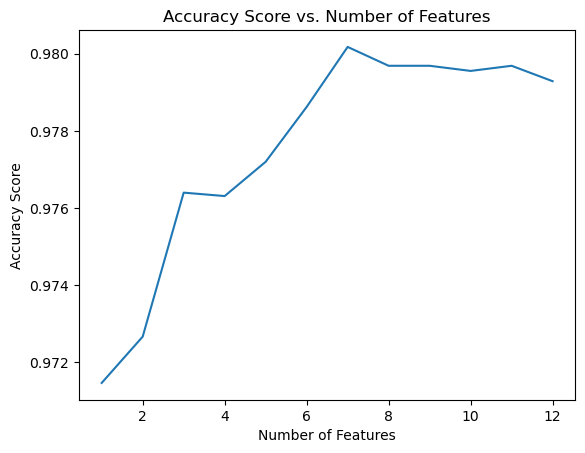

In [20]:
# RFE
explanatory = prepped_for_lrm.iloc[:, 1:]
explanatory = explanatory.drop(['TotalCharge', 'Additional_charges', 'VitD_levels', 'Complication_risk', 'Age'], axis = 1)
target = prepped_for_lrm.iloc[:, 0]
# Create the RandomForestClassifier model
rf_model = RandomForestClassifier()

# Split the data into train and test sets
explanatory_train, explanatory_test, target_train, target_test = train_test_split(explanatory, target, test_size=0.25, random_state=0)

# Define number of features to evaluate
num_features = [i for i in range(1, explanatory.shape[1] + 1)]

# Store accuracy scores for each number of features
accuracy_scores = []

# Enumerate each number of features
for k in num_features:
    # Make pipeline
    rf_selector = RFE(estimator=rf_model, n_features_to_select=k, verbose=1)
    pipeline = Pipeline(steps=[('rf_selector', rf_selector), ('rf_classifier', rf_model)])

    # Fit data to pipeline
    pipeline.fit(explanatory_train, target_train)

    # Evaluate the model. Accuracy for scoring. Accuracy it the proportion of predictions that are correct, which aligns well with our research question of identifying the factors that influence
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(pipeline, explanatory_train, target_train, scoring='accuracy', cv=cv, n_jobs=-1, error_score=0)
    
    # Store accuracy score for current k
    accuracy_scores.append(np.mean(n_scores))
    
    remaining_vars = ', '.join(explanatory.columns[rf_selector.support_])
    print(f'Model with {k} features:')
    print(f'Accuracy score: {np.mean(n_scores):.3f}')
    print(f'Remaining variables: {remaining_vars}\n')

# Plot accuracy scores vs. number of features
plt.plot(num_features, accuracy_scores)
plt.xlabel('Number of Features')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score vs. Number of Features')
plt.show()


## feature importance

In [22]:
best_features_indices = rf_selector.support_
feature_importances = rf_model.feature_importances_

for i, feature in enumerate(explanatory.columns[best_features_indices]):
    print(f'{feature}: {feature_importances[i]}')


Initial_days: 0.94393572836099
Anxiety: 0.002757965267212465
Diabetes: 0.0029283013361677776
Soft_drink: 0.0024526402897142164
Income: 0.03180437923444236
HighBlood: 0.002861741415098901
Overweight: 0.00241661527210541
Hyperlipidemia: 0.0026220711837231696
Initial_admin_Emergency Admission: 0.0027290914225816536
Initial_admin_Observation Admission: 0.0016345803502519594
Male: 0.0029154459263061798
Nonbinary: 0.000941439941405885


In [23]:
# RFE Reduction for Appendices
# Explanatory variables, dropping variables from initial prepped dataset
scratch_ex = prepped_for_lrm.iloc[:, 1:]
scratch_ex = pd.DataFrame(scratch_ex[['Initial_days', 'Income', 'Initial_admin_Emergency Admission', 'Anxiety', 'Diabetes', 'HighBlood', 'Overweight', 'Male']])
# scratch_ex = scratch_ex.drop(['Initial_days', 'Income', 'Initial_admin_Emergency Admission', 'Anxiety', 'Diabetes', 'HighBlood', 'Overweight', 'Male'], axis = 1)
# scratch_ex = scratch_ex.drop(['TotalCharge', 'Additional_charges', 'VitD_levels', 'Complication_risk', 'Age', 'Income', 'Soft_drink', 'Nonbinary', 'Male', 'Overweight', 'Diabetes', 'Hyperlipidemia'], axis = 1)

# Target variable
scratch_target = prepped_for_lrm.iloc[:, 0]
# add the intercept
scratch_ex = sm.add_constant(scratch_ex)
scratch_model = sm.Logit(scratch_target, scratch_ex).fit()
# get predictions
predictions = scratch_model.predict(scratch_ex)
# Calculate AIC
aic_score = scratch_model.aic
print("AIC Score:", aic_score)
# Look at the results. run the summary() command
scratch_summary = scratch_model.summary()
print(scratch_summary)

Optimization terminated successfully.
         Current function value: 0.043677
         Iterations 13
AIC Score: 891.5494474692495
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9991
Method:                           MLE   Df Model:                            8
Date:                Mon, 14 Aug 2023   Pseudo R-squ.:                  0.9335
Time:                        08:39:06   Log-Likelihood:                -436.77
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const                           

# D3 - Reduced Logistic Regression Model

In [24]:
# stepwise model
# Explanatory variables
explanatory = prepped_for_lrm.iloc[:, 1:]
explanatory_var = pd.DataFrame(explanatory[['Initial_days', 'Anxiety', 'HighBlood', 'Initial_admin_Emergency Admission', 'Initial_admin_Observation Admission']])
# Target variable
target = prepped_for_lrm.iloc[:, 0]
# fit and add the intercept
explanatory_var = sm.add_constant(explanatory_var)
model_reduced = sm.Logit(target, explanatory_var).fit()
# get predictions
predictions_reduced = model_reduced.predict(explanatory_var)
# Calculate AIC
aic_score = model_reduced.aic
print("AIC Score:", aic_score)
# Look at the results. run the summary() command
print(model_reduced.summary())

Optimization terminated successfully.
         Current function value: 0.043601
         Iterations 13
AIC Score: 884.0101086772802
                           Logit Regression Results                           
Dep. Variable:                ReAdmis   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9994
Method:                           MLE   Df Model:                            5
Date:                Mon, 14 Aug 2023   Pseudo R-squ.:                  0.9337
Time:                        08:39:37   Log-Likelihood:                -436.01
converged:                       True   LL-Null:                       -6572.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                       

# E2 - Outputs and Calculations
## Confusion Matrix and Accuracy calculations

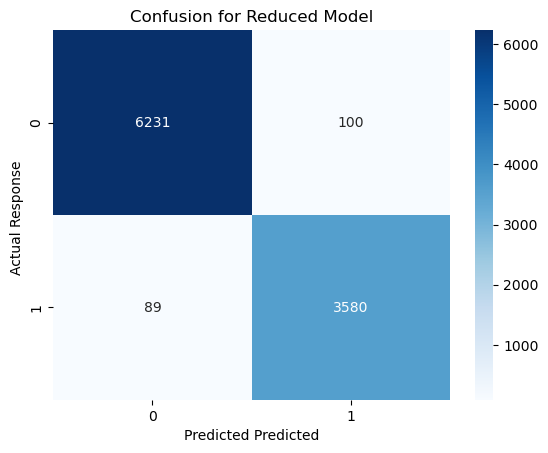


accuracy:  0.9811
sensitivity:  0.975742709185064
specificity:  0.9842047069973148

True negative: 6231.0
True positive: 3580.0
False negative: 89.0
False positive 100.0


In [25]:
# Calculate the confusion matrix
conf_matrix = model_reduced.pred_table()

# Visualize the confusion matrix using seaborn
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.title('Confusion for Reduced Model')
plt.xlabel('Predicted Predicted')
plt.ylabel('Actual Response ')
plt.show()
# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TN + TP) / (TN + TP + FN + FP)
print("\naccuracy: ", accuracy)
# Calculate and print the sensitivity
sensitivity = TP / (FN + TP)
print("sensitivity: ", sensitivity)

# Calculate and print the specificity
specificity = TN / (TN + FP)
print("specificity: ", specificity)
# Print these values
print(f"\nTrue negative: {TN}")
print(f"True positive: {TP}")
print(f"False negative: {FN}")
print(f"False positive {FP}")

In [30]:
# Get the coefficient values from the summary
const = -65
initial_days = 1.2072
anxiety = -0.7270
highblood = 0.6562
initial_admin_emergency = 1.8057
initial_admin_observation = 0.5605

# Calculate the percent change in the odds using the formula
const_pct = (np.exp(const) - 1) * 100 # baseline percent change
initial_days_pct = (np.exp(initial_days) - 1) * 100 # percent change per unit increase
anxiety_pct = (np.exp(anxiety) - 1) * 100 # percent change for having anxiety vs not having anxiety
highblood_pct = (np.exp(highblood) - 1) * 100 # percent change for having high blood pressure vs not having high blood pressure
initial_admin_emergency_pct = (np.exp(initial_admin_emergency) - 1) * 100 # percent change for being admitted as an emergency vs being admitted as an elective
initial_admin_observation_pct = (np.exp(initial_admin_observation) - 1) * 100 # percent change for being admitted as an observation vs being admitted as an elective

# Print the results
print(f"The baseline percent change in the odds of being readmitted is {const_pct:.2f}%")
print(f"The percent change in the odds of being readmitted for each additional day in the initial hospital stay is {initial_days_pct:.2f}%")
print(f"The percent change in the odds of being readmitted for having anxiety compared to not having anxiety is {anxiety_pct:.2f}%")
print(f"The percent change in the odds of being readmitted for having high blood pressure compared to not having high blood pressure is {highblood_pct:.2f}%")
print(f"The percent change in the odds of being readmitted for being admitted as an emergency compared to being admitted as an elective is {initial_admin_emergency_pct:.2f}%")
print(f"The percent change in the odds of being readmitted for being admitted as an observation compared to being admitted as an elective is {initial_admin_observation_pct:.2f}%")

The baseline percent change in the odds of being readmitted is -100.00%
The percent change in the odds of being readmitted for each additional day in the initial hospital stay is 234.41%
The percent change in the odds of being readmitted for having anxiety compared to not having anxiety is -51.66%
The percent change in the odds of being readmitted for having high blood pressure compared to not having high blood pressure is 92.75%
The percent change in the odds of being readmitted for being admitted as an emergency compared to being admitted as an elective is 508.42%
The percent change in the odds of being readmitted for being admitted as an observation compared to being admitted as an elective is 75.15%
